In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_016C_travel_time.csv')
route_list_SSID12881289 = ['0016', '0068', '0122', '0009', '068A']
for r in route_list_SSID12881289:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,1278,8,068A0001,0.0,44951278,False,4495,2012-11-06,18,1909,15.0
1,Tuesday,1282,8,068A0001,0.0,12781282,False,1278,2012-11-06,19,1909,15.0
2,Tuesday,4456,8,068A0001,0.0,12824456,False,1282,2012-11-06,41,1909,15.0
3,Tuesday,1284,8,068A0001,0.0,44561284,False,4456,2012-11-06,62,1909,15.0
4,Tuesday,1285,8,068A0001,0.0,12841285,False,1284,2012-11-06,297,1909,15.0
5,Tuesday,1286,8,068A0001,0.0,12851286,False,1285,2012-11-06,181,1909,15.0
6,Tuesday,1288,8,068A0001,0.0,12861288,False,1286,2012-11-06,72,1909,15.0
7,Tuesday,1289,8,068A0001,0.0,12881289,False,1288,2012-11-06,37,1909,15.0
8,Tuesday,1360,9,068A0001,0.0,12891360,False,1289,2012-11-06,114,1909,15.5
9,Tuesday,1362,9,068A0001,0.0,13601362,False,1360,2012-11-06,39,1909,15.5


time: 2.26 s


Description:  This segment is on South Circular Road, going out of the city centre, just before Leonards' Corner.

In [3]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	482
HourFrame	19
JourneyPatternID	28
Rain	125
SSID	3144
SchoolHoliday	2
SourceStopID	481
TimeFrame	57
TravelTime	1445
VehicleJourneyID	3304
WindSpeed	58
time: 206 ms


In [4]:
# create dataframe for SSID 12881289

res['SSID'] = res['SSID'].astype('category')
bloomfield = res[res.SSID == 12881289]
bloomfield.shape

(10619, 12)

time: 140 ms


In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in bloomfield:
    print(column + "\t" + str(len(bloomfield[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	19
JourneyPatternID	11
Rain	122
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	56
TravelTime	142
VehicleJourneyID	1731
WindSpeed	58
time: 8 ms


In [6]:
# drop unneeded columns

bloomfield = bloomfield.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 4 ms


In [7]:
# reorder columns

bloomfield = bloomfield[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 3 ms


In [8]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
bloomfield.SSID = bloomfield.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 30 ms


In [9]:
bloomfield.reset_index(inplace=True)
bloomfield = bloomfield.drop('index', axis=1)
bloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,37,8,Tuesday,False,0.000000,15.0,2012-11-06,068A0001,1909,12881289
1,20,10,Tuesday,False,0.000000,16.5,2012-11-06,068A0001,1911,12881289
2,79,15,Tuesday,False,0.000000,16.5,2012-11-06,068A0001,1912,12881289
3,60,17,Tuesday,False,0.000000,14.0,2012-11-06,068A0001,2080,12881289
4,43,18,Tuesday,False,0.000000,14.0,2012-11-06,068A0001,2081,12881289
5,21,10,Wednesday,False,0.000000,16.5,2012-11-07,068A0001,1911,12881289
6,40,15,Wednesday,False,0.000000,15.0,2012-11-07,068A0001,1912,12881289
7,98,16,Wednesday,False,0.000000,16.5,2012-11-07,068A0001,1913,12881289
8,57,17,Wednesday,False,0.033333,18.0,2012-11-07,068A0001,2080,12881289
9,43,18,Wednesday,False,0.033333,16.0,2012-11-07,068A0001,2081,12881289


time: 35 ms


In [10]:
# save as csv

r = bloomfield.loc[0, 'SSID'] 
bloomfield.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 70 ms


In [45]:
# load csv

bloomfield = pd.read_csv('SSID_CSVs/SSID_12881289.csv')

time: 15 ms


In [46]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

bloomfield.SSID = bloomfield.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 9 ms


In [47]:
bloomfield.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10619 entries, 0 to 10618
Data columns (total 11 columns):
Unnamed: 0          10619 non-null int64
TravelTime          10619 non-null int64
HourFrame           10619 non-null int64
Day                 10619 non-null object
SchoolHoliday       10619 non-null bool
Rain                10619 non-null float64
WindSpeed           10619 non-null float64
TimeFrame           10619 non-null object
JourneyPatternID    10619 non-null object
VehicleJourneyID    10619 non-null int64
SSID                10619 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 3.1 MB
time: 14 ms


In [48]:
bloomfield = bloomfield.drop('Unnamed: 0', axis=1)

time: 3 ms


In [49]:
# assign more appropriate datatypes
bloomfield['Day'] = bloomfield['Day'].astype('category')
bloomfield['JourneyPatternID'] = bloomfield['JourneyPatternID'].astype('category')
bloomfield['VehicleJourneyID'] = bloomfield['VehicleJourneyID'].astype('category')
bloomfield['SSID'] = bloomfield['SSID'].astype('category')
bloomfield['HourFrame'] = bloomfield['HourFrame'].astype('category')
bloomfield['TimeFrame'] = pd.to_datetime(bloomfield['TimeFrame'], format='%Y-%m-%d')

time: 13 ms


In [50]:
# necessary for later operation

bloomfield.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 2 ms


In [51]:
bloomfield.memory_usage(deep=True)

Index                   80
TravelTime           84952
HourFrame            11411
Day                  11388
SchoolHoliday        10619
Rain                 84952
WindSpeed            84952
TimeFrame            84952
JourneyPatternID     11314
VehicleJourneyID    117006
SSID                 10764
dtype: int64

time: 6 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

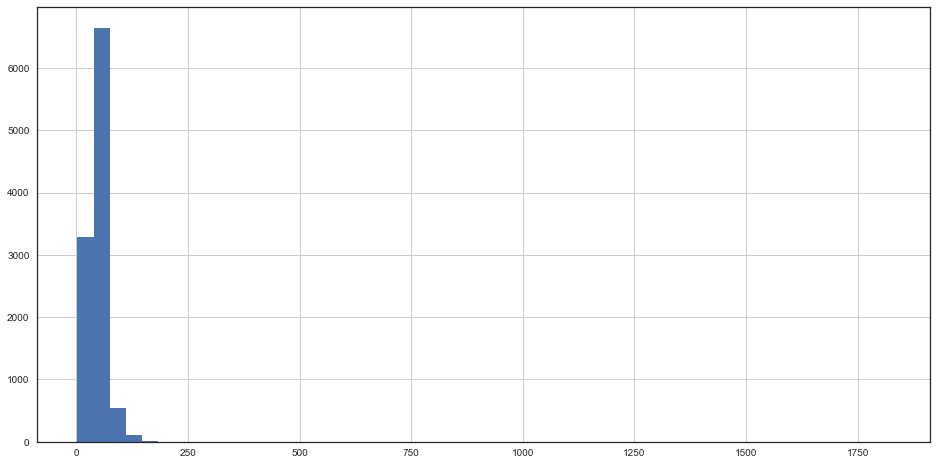

time: 222 ms


In [52]:
bloomfield.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

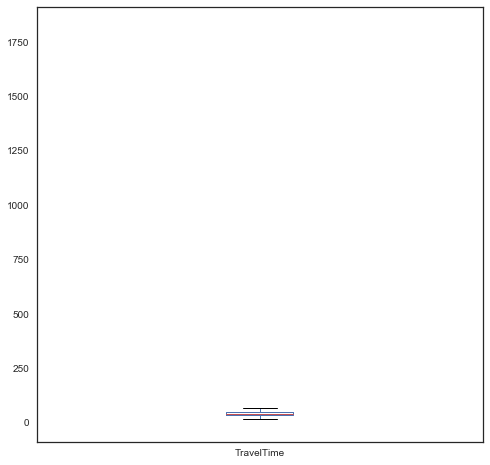

time: 177 ms


In [53]:
bloomfield.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [54]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

bloomfield.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
bloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
2300,1820,22,Sunday,True,0.000000,9.0,2013-01-13,90001,15025,12881289
8396,252,16,Friday,False,0.000000,5.5,2012-11-30,160001,4949,12881289
9367,248,16,Thursday,False,0.000000,13.5,2013-01-17,160001,4829,12881289
1512,220,8,Wednesday,False,0.000000,6.5,2012-11-28,90001,3827,12881289
71,204,16,Friday,False,0.000000,12.0,2012-11-23,068A0001,1709,12881289
7813,200,16,Tuesday,False,0.000000,18.0,2012-11-20,160001,4926,12881289
3552,200,16,Saturday,True,0.000000,10.5,2012-11-10,1220001,8891,12881289
6482,172,18,Wednesday,False,0.033333,16.0,2012-11-07,680004,1934,12881289
1598,163,17,Friday,False,0.000000,4.0,2012-11-30,90001,3743,12881289
583,163,18,Monday,False,0.000000,14.0,2012-11-12,90001,4429,12881289


time: 44 ms


Observation:  One outrageous outlier here - over half an hour.  Plenty to be trimmed either side, probably, but this _is_ a short segment.

## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

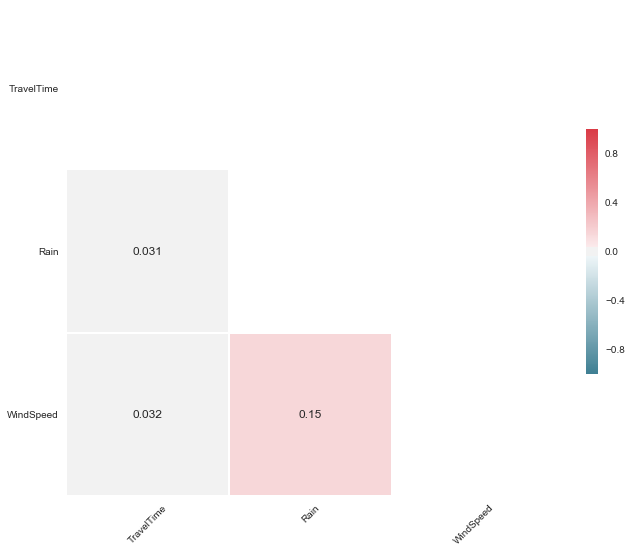

time: 190 ms


In [55]:
# checking correlations between weather and TravelTime

cont_columns = bloomfield[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = bloomfield[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

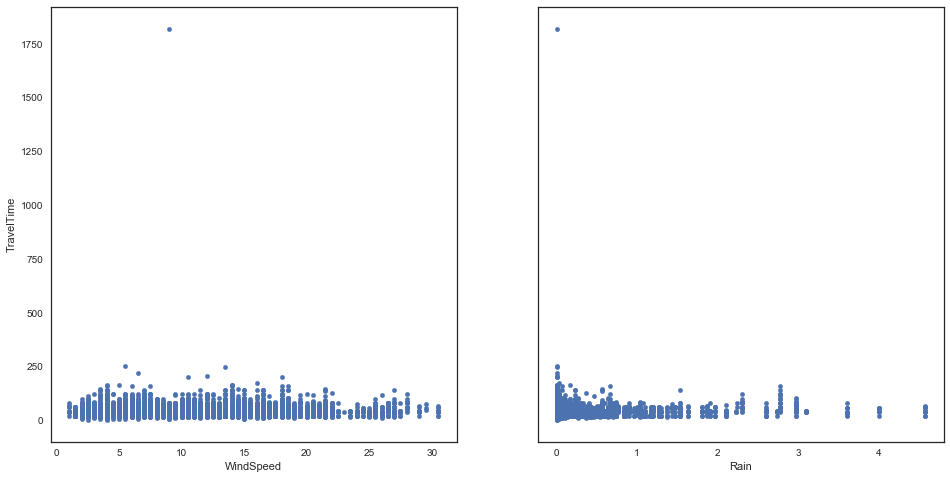

time: 478 ms


In [56]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
bloomfield.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
bloomfield.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  That outlier.

## TravelTime and categorical features

In [57]:
# Checking stats for TravelTime so as to better understand the following graphs
# Create values for horizontal lines in the charts below to represent the mean/medium.

bloomfield_mean = bloomfield.TravelTime.mean()
bloomfield_median  = bloomfield.TravelTime.median()
bloomfield.TravelTime.describe()

count    10619.000000
mean        42.558245
std         26.245258
min          2.000000
25%         35.000000
50%         40.000000
75%         48.000000
max       1820.000000
Name: TravelTime, dtype: float64

time: 8 ms


## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

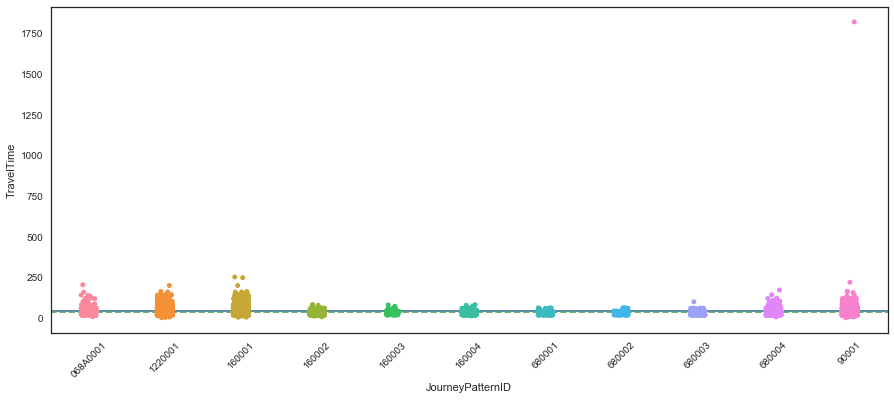

time: 429 ms


In [58]:
bloomfield.JourneyPatternID.cat.remove_unused_categories(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=bloomfield, jitter=True);

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_z1 = bloomfield_median
coord_x2 = 30


# mean full line, median dashed line
plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation: If there was ever an argument for deleting outlers... 

### Bar plot for mean TravelTime per JourneyPatternID

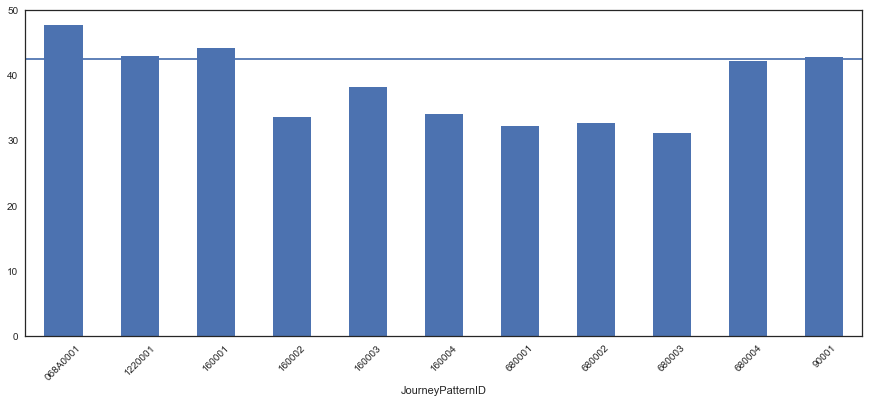

time: 219 ms


In [59]:
mean_JPID = bloomfield.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per JourneyPatternID

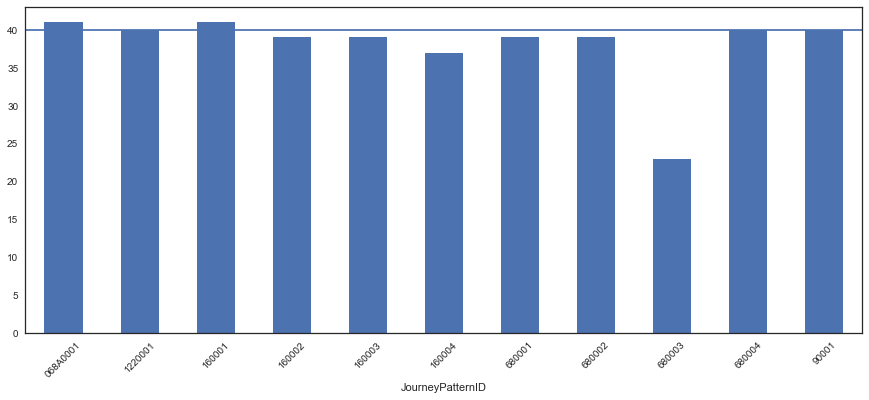

time: 166 ms


In [60]:
median_JPID = bloomfield.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Not much difference at all here - just one (probably infrequent) bus at a much shrter average time and that's all.

### Bar plot for mean TravelTime per HourFrame

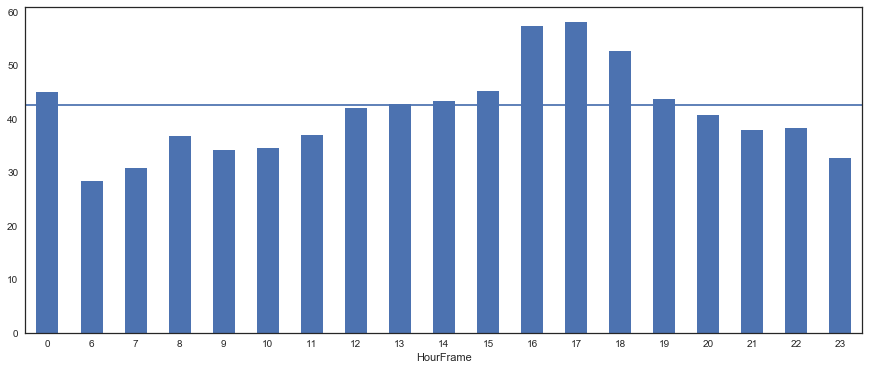

time: 183 ms


In [61]:
mean_HF = bloomfield.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

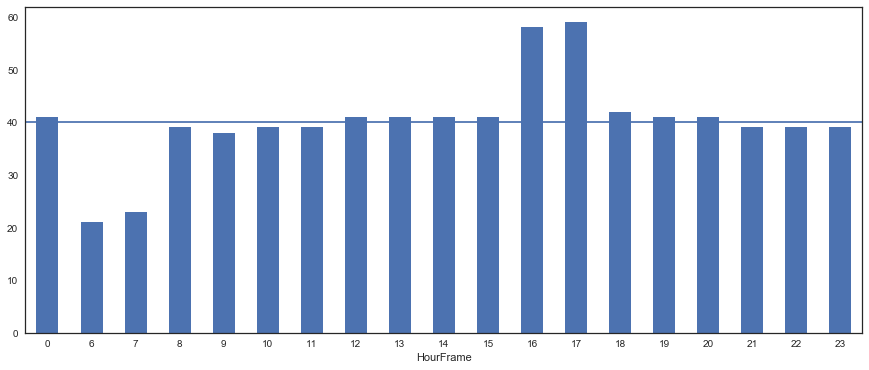

time: 198 ms


In [62]:
med_HF = bloomfield.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  At median almost all day, but quiet in the very early hours, very busy at late rush-hour.

### Bar plot for mean TravelTime per Day

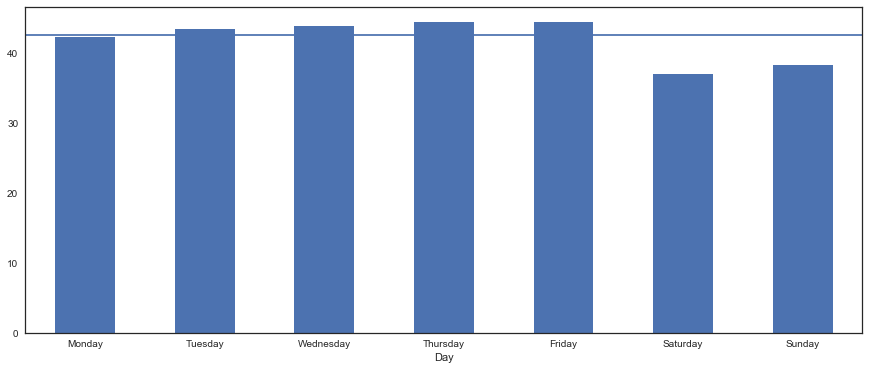

time: 155 ms


In [63]:
mean_Day = bloomfield.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

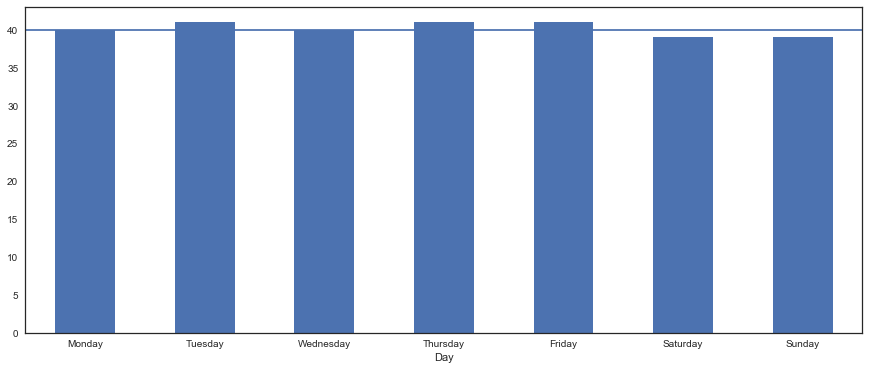

time: 151 ms


In [79]:
med_Day = bloomfield.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Slightly quieter at weekends, but very little difference here.  There doesn't seem to be a whole lot to go on in this segment.

### Bar plot for mean TravelTime when SchoolHoliday true/false

In [65]:
# check how many rows are true/false for SchoolHoliday
bloomfield.SchoolHoliday.describe().T

count     10619
unique        2
top       False
freq       7819
Name: SchoolHoliday, dtype: object

time: 11 ms


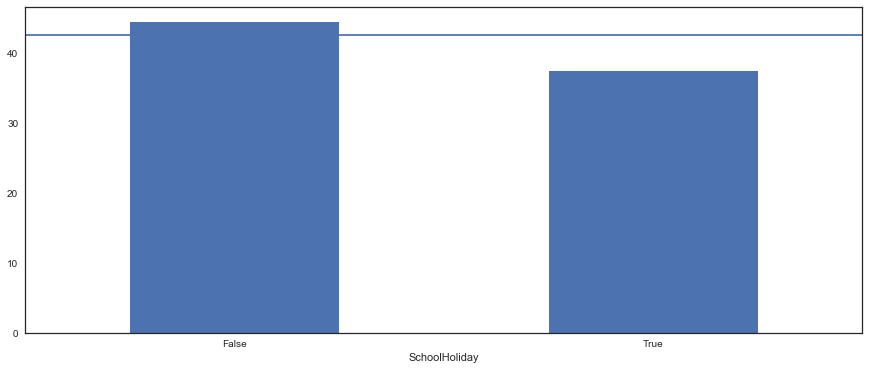

time: 131 ms


In [66]:
mean_SH = bloomfield.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime when SchoolHoliday true/false

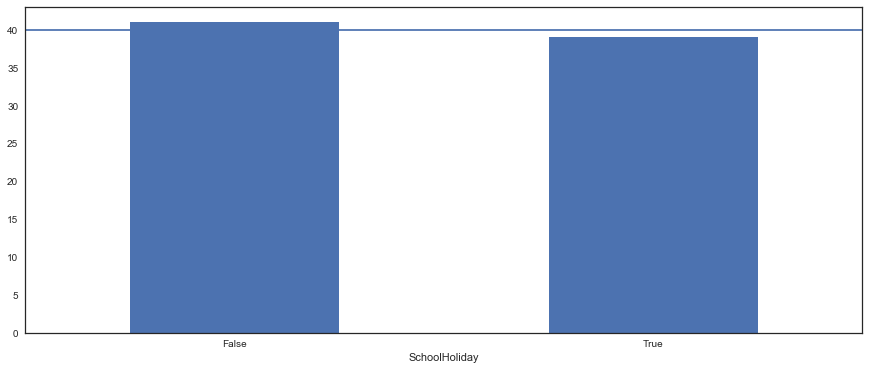

time: 141 ms


In [67]:
med_SH = bloomfield.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Small effect.

## Looking at dropping outliers

In [69]:
# make a copy of original df
trimbloomfield = bloomfield.copy()

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimbloomfield.quantile(q=.25) - (3*(trimbloomfield.quantile(q=.75)-trimbloomfield.quantile(q=.25)))
upperOp = trimbloomfield.quantile(q=.75) + (3*(trimbloomfield.quantile(q=.75)-trimbloomfield.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimbloomfield['OutlierTT'] = (trimbloomfield['TravelTime'] < lowerOp['TravelTime']) | (trimbloomfield['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There would be", trimbloomfield[(trimbloomfield['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 267 outliers dropped.
time: 23 ms


In [70]:
trimbloomfield = trimbloomfield[trimbloomfield.OutlierTT != True]
trimbloomfield.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 72 ms


In [71]:
trimbloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,XBuses,OutlierTT
605,87,8,Tuesday,False,0.000000,17.0,2012-11-13,90001,4341,12881289,0,False
3204,86,16,Tuesday,False,2.300781,28.0,2013-01-29,90001,3620,12881289,0,False
2914,86,9,Thursday,False,0.000000,2.0,2013-01-24,90001,3586,12881289,0,False
2928,86,13,Thursday,False,0.000000,7.0,2013-01-24,90001,3613,12881289,0,False
9686,86,12,Wednesday,False,0.000000,10.5,2013-01-23,160001,4752,12881289,0,False
5514,86,18,Friday,False,0.733398,18.0,2013-01-18,1220001,1460,12881289,0,False
5088,86,13,Thursday,False,0.566895,3.0,2013-01-10,1220001,1426,12881289,0,False
8762,86,17,Monday,False,0.033333,14.5,2013-01-07,160001,4749,12881289,0,False
7961,86,12,Thursday,False,0.033333,12.5,2012-11-22,160001,5492,12881289,0,False
200,86,16,Tuesday,False,2.300000,28.0,2013-01-29,068A0001,1680,12881289,0,False


time: 44 ms


NOTE - Outliers not removed.

Observation:  

### Linear Regression model

In [72]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRbloomfield = bloomfield.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRbloomfield['SchoolHoliday'] = LRbloomfield['SchoolHoliday'].astype('int')

time: 4 ms


In [80]:
# preliminary training to see which variables are worth selecting
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=LRbloomfield).fit()

time: 79 ms


In [81]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     40.08
Date:                Mon, 31 Jul 2017   Prob (F-statistic):          5.06e-268
Time:                        00:54:44   Log-Likelihood:                -49068.
No. Observations:               10619   AIC:                         9.821e+04
Df Residuals:                   10581   BIC:                         9.849e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Observation:  Only 0.12 r-squared!  Have another go without JPIDs and with oui

In [75]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.119861904638 means that Linear Regression is unlikely to be useful in the long run though.
time: 10 ms


In [76]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRbloomfield.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRbloomfield.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRbloomfield.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRbloomfield = pd.concat([LRbloomfield, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 12 ms


In [77]:
print(LRbloomfield.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'XBuses', 'HF_0', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_068A0001', 'JPID_1220001', 'JPID_160001', 'JPID_160002', 'JPID_160003', 'JPID_160004', 'JPID_680001', 'JPID_680002', 'JPID_680003', 'JPID_680004', 'JPID_90001']
time: 3 ms


In [ ]:
LRbloomfield.head(25)

In [82]:
lrle1 = sm.ols(formula="TravelTime ~  JPID_680003 + SchoolHoliday + WindSpeed + Rain + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday", data=LRbloomfield).fit()

time: 60 ms


In [83]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     52.58
Date:                Mon, 31 Jul 2017   Prob (F-statistic):          2.54e-273
Time:                        00:59:30   Log-Likelihood:                -49073.
No. Observations:               10619   AIC:                         9.820e+04
Df Residuals:                   10590   BIC:                         9.842e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.2136      0.748     47.084

Observation:  The other numbers settle down a bit, but this isn't looking great.  Going to try with outliers cut.

In [84]:
# rerunning linear regression trained on the model with outliers removed.  Results better.
trimbloomfield = trimbloomfield.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
trimbloomfield['SchoolHoliday'] = trimbloomfield['SchoolHoliday'].astype('int')

time: 3 ms


In [85]:
lrle2 = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=trimbloomfield).fit()

time: 77 ms


In [86]:
print(lrle2.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     71.15
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:01:28   Log-Likelihood:                -41992.
No. Observations:               10352   AIC:                         8.406e+04
Df Residuals:                   10314   BIC:                         8.433e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

A lot better, but still not that useful.